In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df=df.drop(['Cabin'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [4]:
df.shape

(891, 11)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [6]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
df["Embarked"].fillna("S", inplace=True)


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

C:\Users\priya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

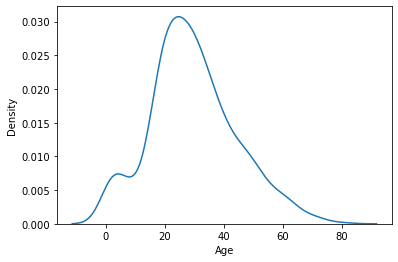

In [9]:
sns.distplot(df["Age"], hist=False)
#This is the distribution of age before imputation.

In [10]:
df["Age"].skew()
#THE AGE PLOT IS CLOSE TO NORMAL DISTRIBUTION SO WE CAN DO MEAN IMPUTATION.

0.38910778230082704

In [11]:
df["Age"].mean()

29.69911764705882

In [12]:
df["Age"].fillna(df["Age"].mean(), inplace= True)


In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='Age', ylabel='Density'>

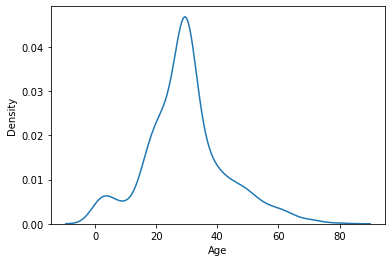

In [15]:
sns.distplot(df["Age"], hist=False)
#This is the distribution of age after imputation.

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
columns_to_plot = ['Age', 'Fare']

<AxesSubplot:>

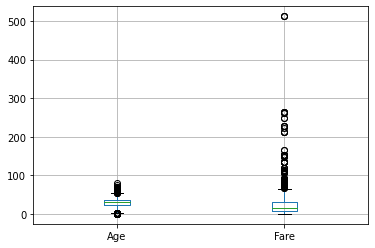

In [18]:
df[columns_to_plot].boxplot()


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

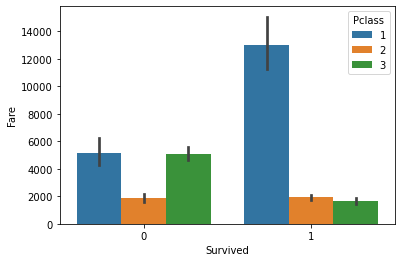

In [19]:
sns.barplot(data=df, x='Survived', y='Fare', hue='Pclass', estimator=np.sum)
#It is visible the people who didn't survived even in pclass1 they have paid less as compared to people who survived.


In [20]:
df_pclass=df[df['Pclass'] == 1]['Fare']
df_pclass
#Doubt(how someone has paid only 0 and travelling in pclass1)

1      71.2833
3      53.1000
6      51.8625
11     26.5500
23     35.5000
        ...   
871    52.5542
872     5.0000
879    83.1583
887    30.0000
889    30.0000
Name: Fare, Length: 216, dtype: float64

In [21]:
df_pclass.mean()

84.15468749999992

<AxesSubplot:xlabel='Fare', ylabel='Density'>

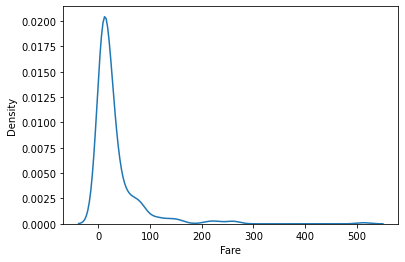

In [22]:
sns.distplot(df["Fare"], hist=False)

In [23]:
df["Fare"].skew()

4.787316519674893

In [24]:
IQR=df['Fare'].quantile(0.75)- df['Fare'].quantile(0.25)
IQR

23.0896

In [25]:
upper_lim= df['Fare'].quantile(0.75)+ 1.5*IQR + 184.3656
upper_lim

250.0

In [26]:
lower_lim= df['Fare'].quantile(0.75)-1.5*IQR
lower_lim

-3.6343999999999994

In [27]:
np.sum(df["Fare"]>65.6344)
#ACCORDING TO IQR METHOD 116 PEOPLE ARE OUTLIERS, BUT WE SHOULDN'T TAKE THEM AS OUTLIERS THERE CAN BE SOME RICH WHO CAN PAY HIGH.

116

In [28]:
np.sum(df["Fare"]>250)
#AS WE CAN SEE THERE ARE ONLY 9 PEOPLE ABOVE 250 SO WE CAN CONSIDER THEM AS OUTLIER AS ONLY 9 PEOPLE HAVE PAID BETWEEN 250 AND 512.

9

In [29]:
df = df.copy()

df['Fare'] = np.where(
    df['Fare'] > upper_lim,
    upper_lim,
    np.where(
        df['Fare'] < lower_lim,
        lower_lim,
        df['Fare']
    )
)

In [30]:
df["Fare"].max()

250.0

<AxesSubplot:xlabel='Fare', ylabel='Density'>

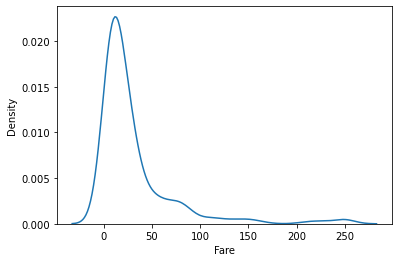

In [31]:
sns.distplot(df["Fare"], hist=False)

In [32]:
upper_lim1= df["Age"].mean() + 3*df["Age"].std()
upper_lim1

68.70516332506742

In [33]:
lower_lim1= df["Age"].mean() - 3*df["Age"].std()
lower_lim1

-9.30692803094989

In [34]:
np.sum(df["Age"]>68.70)

7

In [35]:
df[df["Age"]>68.70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,S


In [36]:
df["Fare"].skew()

3.118988836371978

In [37]:
df.groupby(['Pclass'])['Survived'].mean()*100
#this shows that survived depend on pclass because pclass1 survival rate is higher than pclass3

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [38]:
df.groupby(['Sex'])['Survived'].mean()*100
#female survival rate is higher than male

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [39]:
df.groupby(['Embarked'])['Survived'].mean()*100
#People boarding from C has survived more

Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64

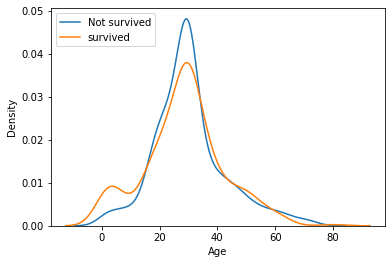

In [40]:
sns.distplot(df["Age"][df["Survived"]==0], hist=False)
sns.distplot(df["Age"][df["Survived"]==1], hist=False)
plt.legend( loc="upper left", labels=["Not survived", "survived"])
#THIS SHOWS THAT KIDS AND OLD PEOPLE HAVE SURVIVED MORE AS COMPARED TO YOUNGER ADULTS. 

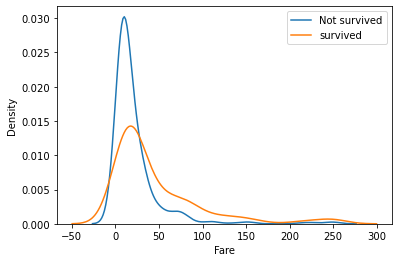

In [41]:
sns.distplot(df["Fare"][df["Survived"]==0], hist=False)
sns.distplot(df["Fare"][df["Survived"]==1], hist=False)
plt.legend( loc="upper right", labels=["Not survived", "survived"])

#As the fare is increasing people are surviving more.


In [42]:
df.drop(columns=["Name","Ticket"], inplace=True)

In [43]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [44]:
df["Family"]=df["SibSp"]+df["Parch"]+1

In [45]:
df.groupby(['Family'])['Survived'].mean()*100
#here we can observe that people travelling with many members were not able to survive.

Family
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64

In [46]:
def logic(n):
    if n==1:
        return "Alone"
    elif n>1 and n<5:
        return "Medium"
    else:
        return "Large"

In [47]:
df["Family_size"]= df["Family"].apply(logic)

In [48]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family_size
0,1,0,3,male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,female,38.0,1,0,71.2833,C,2,Medium
2,3,1,3,female,26.0,0,0,7.9250,S,1,Alone
3,4,1,1,female,35.0,1,0,53.1000,S,2,Medium
4,5,0,3,male,35.0,0,0,8.0500,S,1,Alone


In [49]:
passenger_id= df["PassengerId"].values

In [50]:
df.drop(columns=["SibSp","Parch","Family","PassengerId"], inplace= True)

In [51]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size
0,0,3,male,22.0,7.2500,S,Medium
1,1,1,female,38.0,71.2833,C,Medium
2,1,3,female,26.0,7.9250,S,Alone
3,1,1,female,35.0,53.1000,S,Medium
4,0,3,male,35.0,8.0500,S,Alone


<AxesSubplot:>

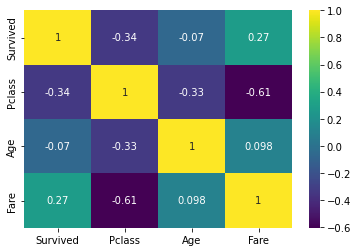

In [52]:
sns.heatmap(df.corr(),annot=True ,cmap="viridis")
#THIS SHOWS THAT OUR OUTPUT VARIABLE('SURVIVED') IS RELATED MAXIMUM WITH PCLASS(-VE) AND FARE(+VE)

In [53]:
df= pd.get_dummies(df, columns=["Pclass","Sex","Embarked","Family_size"], drop_first=True)

In [54]:
df.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_size_Large,Family_size_Medium
0,0,22.0,7.2500,0,1,1,0,1,0,1
1,1,38.0,71.2833,0,0,0,0,0,0,1
2,1,26.0,7.9250,0,1,0,0,1,0,0
3,1,35.0,53.1000,0,0,0,0,1,0,1
4,0,35.0,8.0500,0,1,1,0,1,0,0


In [55]:
df['Embarked_Q'].unique()

array([0, 1], dtype=uint8)

In [56]:
X= df.iloc[:,1:]
y= df.iloc[:,0]

In [57]:
X.head()

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_size_Large,Family_size_Medium
0,22.0,7.2500,0,1,1,0,1,0,1
1,38.0,71.2833,0,0,0,0,0,0,1
2,26.0,7.9250,0,1,0,0,1,0,0
3,35.0,53.1000,0,0,0,0,1,0,1
4,35.0,8.0500,0,1,1,0,1,0,0


In [58]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
lr= LogisticRegression()

In [62]:
lr.fit(X_train,y_train)

LogisticRegression()

In [63]:
y_pred= lr.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [64]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
acc_lr= accuracy_score(y_pred, y_test)
acc_lr

0.7988826815642458

In [67]:
from sklearn.metrics import f1_score
f1_score_lr= f1_score(y_pred, y_test)
f1_score_lr

0.7464788732394366

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf_classifier = RandomForestClassifier()

In [70]:
rf_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [71]:
y_pred_rf=rf_classifier.predict(X_test)
y_pred_rf

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [72]:
acc_rf= accuracy_score(y_pred_rf, y_test)
acc_rf

0.8044692737430168

In [73]:
from sklearn.metrics import f1_score
f1_score_rf= f1_score(y_pred_rf, y_test)
f1_score_rf

0.761904761904762

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
grad_classifier = GradientBoostingClassifier()

In [76]:
grad_classifier.fit(X_train,y_train)

GradientBoostingClassifier()

In [77]:
y_pred_grad= grad_classifier.predict(X_test)
y_pred_grad

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [78]:
acc_grad= accuracy_score(y_pred_grad, y_test)
acc_grad

0.8100558659217877

In [79]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [80]:
P=precision_score(y_pred_grad,y_test)
P

0.6891891891891891

In [81]:
R=recall_score(y_pred_grad,y_test)
R

0.8225806451612904

In [82]:
f1_score_grad= (2*P*R)/(P+R)
f1_score_grad

0.75

In [83]:
from sklearn.ensemble import AdaBoostClassifier

In [84]:
ada_classifier=  AdaBoostClassifier()

In [85]:
ada_classifier.fit(X_train,y_train)

AdaBoostClassifier()

In [86]:
y_pred_ada=ada_classifier.predict(X_test)
y_pred_ada

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [87]:
acc_ada= accuracy_score(y_pred_ada, y_test)
acc_ada

0.8156424581005587

In [88]:
P1=precision_score(y_pred_ada,y_test)
P1

0.7432432432432432

In [89]:
R1=recall_score(y_pred_ada,y_test)
R1

0.7971014492753623

In [90]:
f1_score_ada= (2*P1*R1)/(P1+R1)
f1_score_ada

0.7692307692307693

In [93]:
print("The accuracy and F1 Score of logistic regression is:",acc_lr,"and", f1_score_lr)
print("The accuracy and F1 Score of random forest is:",acc_rf,"and",f1_score_rf)
print("The accuracy and F1 Score of gradient boosting is:",acc_grad,"and",f1_score_grad)
print("The accuracy and F1 Score of adaboost is:",acc_ada,"and",f1_score_ada)

The accuracy and F1 Score of logistic regression is: 0.7988826815642458 and 0.7464788732394366
The accuracy and F1 Score of random forest is: 0.8044692737430168 and 0.761904761904762
The accuracy and F1 Score of gradient boosting is: 0.8100558659217877 and 0.75
The accuracy and F1 Score of adaboost is: 0.8156424581005587 and 0.7692307692307693


In [94]:
#the accuracy and F1 score is best for Adaboost so it is the best algorithm among the 4 algorithms.